In [58]:
from tensorflow.keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [59]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [60]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000:

In [61]:
max([max(sequence) for sequence in train_data])

9999

In [62]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
'''Decodes the review. Note that the indices are offset by 3 
        because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”'''
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


In [63]:
#Encoding the integer sequences into a binary matrix
'''Explaination: I first created 2D matrix of shape(number of examples,10000)
        then I looped over each word of each example, if it exist put 1 in its place
        if not just leave it as 0
        ITS JUST ONE HOT ENCODER'''
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [64]:
X_train.shape

(25000, 10000)

In [65]:
#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [66]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [67]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [68]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 128ms/step - loss: 0.5367 - binary_accuracy: 0.7785 - val_loss: 0.4154 - val_binary_accuracy: 0.8501
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3325 - binary_accuracy: 0.8923 - val_loss: 0.3630 - val_binary_accuracy: 0.8455
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2499 - binary_accuracy: 0.9166 - val_loss: 0.2906 - val_binary_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2020 - binary_accuracy: 0.9315 - val_loss: 0.2853 - val_binary_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1676 - binary_accuracy: 0.9435 - val_loss: 0.2770 - val_binary_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1408 - binary_accuracy: 0.9551 - val_loss: 0.2840 - val_binary_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - lo

In [70]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

## Plotting the training and validation loss

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

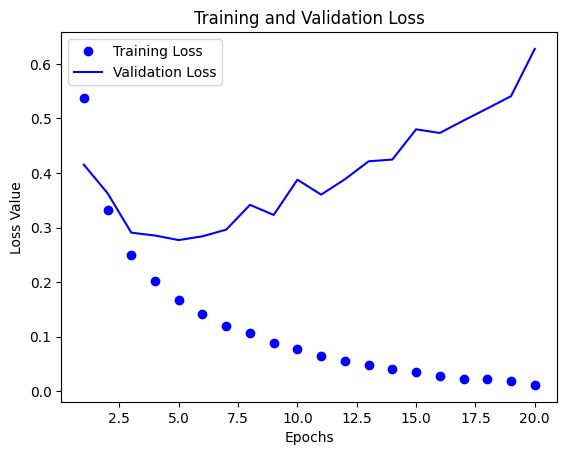

In [72]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

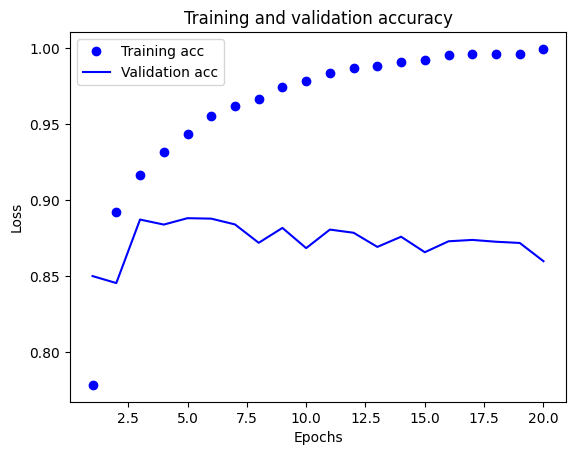

In [73]:
plt.clf() #Clears the figure 
acc_values = history_dict['binary_accuracy'] 
val_acc_values = history_dict['val_binary_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

## Retraining a model from scratch

In [74]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=4, batch_size=512) 


Epoch 1/4
49/49 [==============================] - 3s 47ms/step - loss: 0.4913 - accuracy: 0.8069
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2928 - accuracy: 0.9000
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2270 - accuracy: 0.9182
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1918 - accuracy: 0.9325


In [ ]:
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.2939 - accuracy: 0.8821


## Using a trained network to generate predictions on new data

In [ ]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [ ]:
result

array([[0.27070886],
       [0.9994693 ],
       [0.95478725],
       ...,
       [0.15062027],
       [0.10453504],
       [0.65662706]], dtype=float32)

In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.asarray([round(x) for x in score])

In [ ]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [ ]:
from tensorflow.keras.metrics import mean_absolute_error
mae = mean_absolute_error = (y_pred, y_test)

In [ ]:
# Error
mae

(array([0., 1., 1., ..., 0., 0., 1.]),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))